Core Components: 

* Fiftyone library
* Fiftyone App
* FiftyOne Brain 
* Dataset / Model Zoo
* Plugins


Data model

* Dataset
* Sample
* View
* ViewStage
* Field
* Label
* Tag
* Metadata
* Aggregation

In [1]:
import fiftyone as fo
import fiftyone.zoo as foz

List zoo models and datasets

In [7]:
list_zoo_datasets_detection = foz.list_zoo_datasets('detection')
print(list_zoo_datasets_detection)

['coco-2014', 'coco-2017', 'kitti', 'kitti-multiview', 'open-images-v6', 'open-images-v7', 'sama-coco', 'voc-2007', 'voc-2012']


In [8]:
foz.list_zoo_models("detection")

['centernet-hg104-1024-coco-tf2',
 'centernet-hg104-512-coco-tf2',
 'centernet-mobilenet-v2-fpn-512-coco-tf2',
 'centernet-resnet101-v1-fpn-512-coco-tf2',
 'centernet-resnet50-v1-fpn-512-coco-tf2',
 'centernet-resnet50-v2-512-coco-tf2',
 'efficientdet-d0-512-coco-tf2',
 'efficientdet-d0-coco-tf1',
 'efficientdet-d1-640-coco-tf2',
 'efficientdet-d1-coco-tf1',
 'efficientdet-d2-768-coco-tf2',
 'efficientdet-d2-coco-tf1',
 'efficientdet-d3-896-coco-tf2',
 'efficientdet-d3-coco-tf1',
 'efficientdet-d4-1024-coco-tf2',
 'efficientdet-d4-coco-tf1',
 'efficientdet-d5-1280-coco-tf2',
 'efficientdet-d5-coco-tf1',
 'efficientdet-d6-1280-coco-tf2',
 'efficientdet-d6-coco-tf1',
 'efficientdet-d7-1536-coco-tf2',
 'faster-rcnn-inception-resnet-atrous-v2-coco-tf',
 'faster-rcnn-inception-resnet-atrous-v2-lowproposals-coco-tf',
 'faster-rcnn-inception-v2-coco-tf',
 'faster-rcnn-nas-coco-tf',
 'faster-rcnn-nas-lowproposals-coco-tf',
 'faster-rcnn-resnet101-coco-tf',
 'faster-rcnn-resnet101-lowproposals-

In [9]:
foz.list_downloaded_zoo_models()

{'mobilenet-v2-imagenet-torch': ('/home/borisef/fiftyone/__models__/mobilenet_v2-b0353104.pth',
  <fiftyone.zoo.models.ZooModel at 0x7f97d07a15b0>),
 'clip-vit-base32-torch': ('/home/borisef/fiftyone/__models__/CLIP-ViT-B-32.pt',
  <fiftyone.zoo.models.ZooModel at 0x7f97d07a68b0>)}

In [10]:
dataset = foz.load_zoo_dataset('quickstart')

Dataset already downloaded
Loading existing dataset 'quickstart'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [11]:
session1 = fo.launch_app(dataset, auto=False, desktop=False)

Session launched. Run `session.show()` to open the App in a cell output.



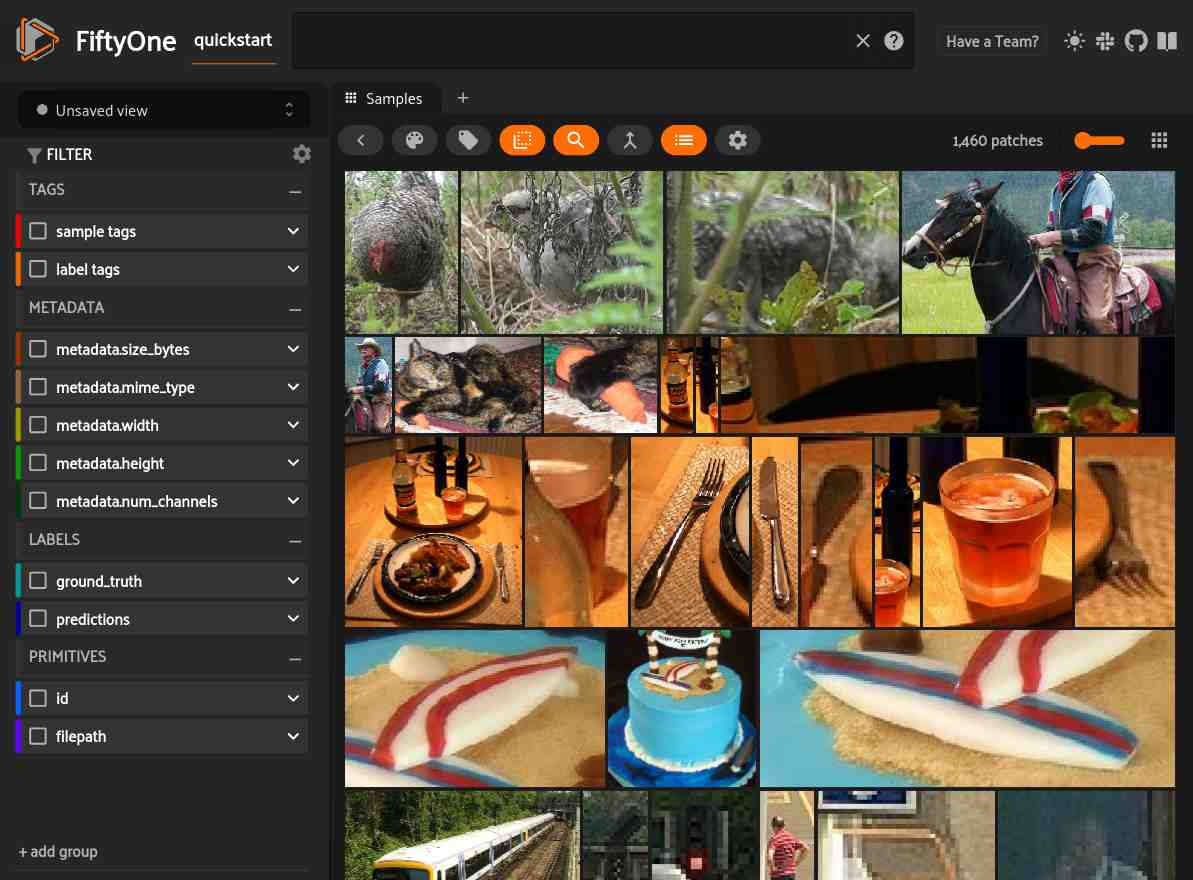

In [35]:
session1.show()

In [15]:
session1.freeze() # freezing app in notebook

In [18]:
import fiftyone.brain as fob

In [19]:
fob.compute_uniqueness(dataset, uniqueness_field="my_uniqueness")

Computing embeddings...


/home/borisef/Envs/fo_python38/lib/python3.8/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


 100% |█████████████████| 200/200 [885.7ms elapsed, 0s remaining, 232.2 samples/s]      
Computing uniqueness...
Uniqueness computation complete


In [23]:
fob.compute_exact_duplicates?

Signature: fob.compute_exact_duplicates(samples, num_workers=None, skip_failures=True)
Docstring:
Detects duplicate media in a sample collection.

This method detects exact duplicates with the same filehash. Use
:meth:`compute_similarity` to detect near-duplicate images.

If duplicates are found, the first instance in ``samples`` will be the key
in the returned dictionary, while the subsequent duplicates will be the
values in the corresponding list.

Args:
    samples: a :class:`fiftyone.core.collections.SampleCollection`
    num_workers (None): an optional number of processes to use
    skip_failures (True): whether to gracefully ignore samples whose
        filehash cannot be computed

Returns:
    a dictionary mapping IDs of samples with exact duplicates to lists of
    IDs of the duplicates for the corresponding sample
File:      ~/Envs/fo_python38/lib/python3.8/site-packages/fiftyone/brain/__init__.py
Type:      function

In [25]:
fob.compute_similarity(dataset,brain_key = "sim") # TODO: EXPLORE

Computing embeddings...
 100% |█████████████████| 200/200 [13.5s elapsed, 0s remaining, 15.2 samples/s]      


In [27]:
# Image embeddings. Run this. See results in App
fob.compute_visualization(dataset, brain_key="img_viz")

Computing embeddings...
 100% |█████████████████| 200/200 [13.9s elapsed, 0s remaining, 15.7 samples/s]      
Generating visualization...
UMAP( verbose=True)
Tue Dec  5 21:31:41 2023 Construct fuzzy simplicial set
Tue Dec  5 21:31:41 2023 Finding Nearest Neighbors
Tue Dec  5 21:31:43 2023 Finished Nearest Neighbor Search
Tue Dec  5 21:31:45 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec  5 21:31:47 2023 Finished embedding


In [33]:
# Object patch embeddings
fob.compute_visualization(
    dataset, patches_field="predictions", brain_key="prediction_bb_viz"
)

Computing patch embeddings...
 100% |█████████████████| 200/200 [6.4m elapsed, 0s remaining, 0.5 samples/s]    
Generating visualization...
UMAP( verbose=True)
Tue Dec  5 21:45:24 2023 Construct fuzzy simplicial set
Tue Dec  5 21:45:24 2023 Finding Nearest Neighbors
Tue Dec  5 21:45:24 2023 Building RP forest with 9 trees
Tue Dec  5 21:45:27 2023 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	Stopping threshold met -- exiting after 4 iterations
Tue Dec  5 21:45:36 2023 Finished Nearest Neighbor Search
Tue Dec  5 21:45:36 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Dec  5 21:45:41 2023 Finished embedding


In [34]:
# Compute metadata so we can reference image height/width in our view
dataset.compute_metadata()

Computing metadata...
 100% |█████████████████| 200/200 [620.3ms elapsed, 0s remaining, 322.4 samples/s]      


In this dataset we already have GT and predictions, lets do evaluation 

In [45]:
#evaluate only predictions with high confidence
from fiftyone import ViewField as F
low_conf_view = dataset.filter_labels("predictions", F("confidence") < 0.75, only_matches=False)


In [46]:
eval_results = fo.evaluate_detections(low_conf_view,pred_field="predictions",gt_field = "ground_truth",eval_key = 'eval',method=None,classwise=True)

Evaluating detections...
 100% |█████████████████| 200/200 [15.2s elapsed, 0s remaining, 9.2 samples/s]       


In [47]:
eval_results.print_report()

                precision    recall  f1-score   support

      airplane       0.06      0.08      0.07        24
         apple       0.00      0.00      0.00         2
      backpack       0.05      0.43      0.08         7
        banana       0.00      0.00      0.00         3
baseball glove       0.29      0.50      0.36         4
          bear       0.00      0.00      0.00         6
           bed       0.00      0.00      0.00         1
         bench       0.10      0.26      0.14        23
       bicycle       0.00      0.00      0.00         0
          bird       0.56      0.57      0.56        96
          boat       0.06      0.24      0.09        37
          book       0.06      0.82      0.12        11
        bottle       0.05      0.40      0.09        10
          bowl       0.11      0.53      0.18        15
      broccoli       0.08      0.62      0.14        16
           bus       0.06      1.00      0.12         1
          cake       0.00      0.00      0.00  

In [54]:
# The top-10 most common classes
counts = dataset.count_values("ground_truth.detections.label")
classes = sorted(counts, key=counts.get, reverse=True)[:10]

In [55]:
#PLOTS
cm = eval_results.plot_confusion_matrix(classes=classes)

In [56]:
session1.plots.attach(cm) # only jupyter

In [57]:
cm.show() #won't work in pycharm

FigureWidget({
    'data': [{'mode': 'markers',
              'opacity': 0.1,
              'selectedpoints': [],
              'type': 'scatter',
              'uid': 'b7f5e25c-dd85-4d5b-aa86-7ade1e75f3b5',
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,
                           7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,
                           3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
                          10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,
                           6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,
                           2,  3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,
                           9, 10,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
                          

In [51]:
session1.show()

RUN DETECTION MODEL (see https://docs.voxel51.com/recipes/adding_detections.html)